In [1]:
from sklearn import linear_model # for linear regression modeling
from sklearn import preprocessing # for preprocessing like imputting missing values
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#Loading data
wind_df=pd.read_csv('wind_generation_data.csv')
solar_df=pd.read_csv('solar_generation_data.csv')

In [4]:
wind_df.head(3)

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35


In [5]:
solar_df.head(3)

,Month,Day,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,Jan,1,109°,85°,30.0,9,0.0,9.93
1,Jan,2,106°,71°,30.1,9,0.0,9.97
2,Jan,3,106°,81°,29.5,9,0.0,9.77


In [6]:
#dropping Month and Day Column
solar_df=solar_df.drop(['Month ', 'Day'],1)

In [7]:
solar_df.head()

,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,109°,85°,30.0,9,0.0,9.93
1,106°,71°,30.1,9,0.0,9.97
2,106°,81°,29.5,9,0.0,9.77
3,102°,83°,13.0,4,0.0,4.30
4,105°,80°,30.1,9,0.0,9.97


In [8]:
#Exploring the dataframes
wind_df.describe()

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


In [9]:
solar_df.describe()

,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
count,365.000000,365.000000,312.000000,365.000000
mean,22.615068,6.972603,2.737179,7.488192
std,5.311600,1.699811,16.472178,1.759069
min,1.500000,1.000000,0.000000,0.500000
25%,18.500000,6.000000,0.000000,6.130000
50%,22.800000,7.000000,0.000000,7.550000
75%,27.000000,9.000000,0.000000,8.940000
max,30.200000,9.000000,161.500000,10.000000


In [10]:
wind_df.describe()

,wind speed,direction,Power Output
count,366.000000,366.000000,366.000000
mean,15.695792,220.081967,37.193607
std,3.743556,4.462796,7.243363
min,7.450000,209.000000,23.170000
25%,13.000000,218.000000,31.352500
50%,15.530000,220.000000,37.525000
75%,18.802500,222.000000,42.925000
max,22.710000,234.000000,51.810000


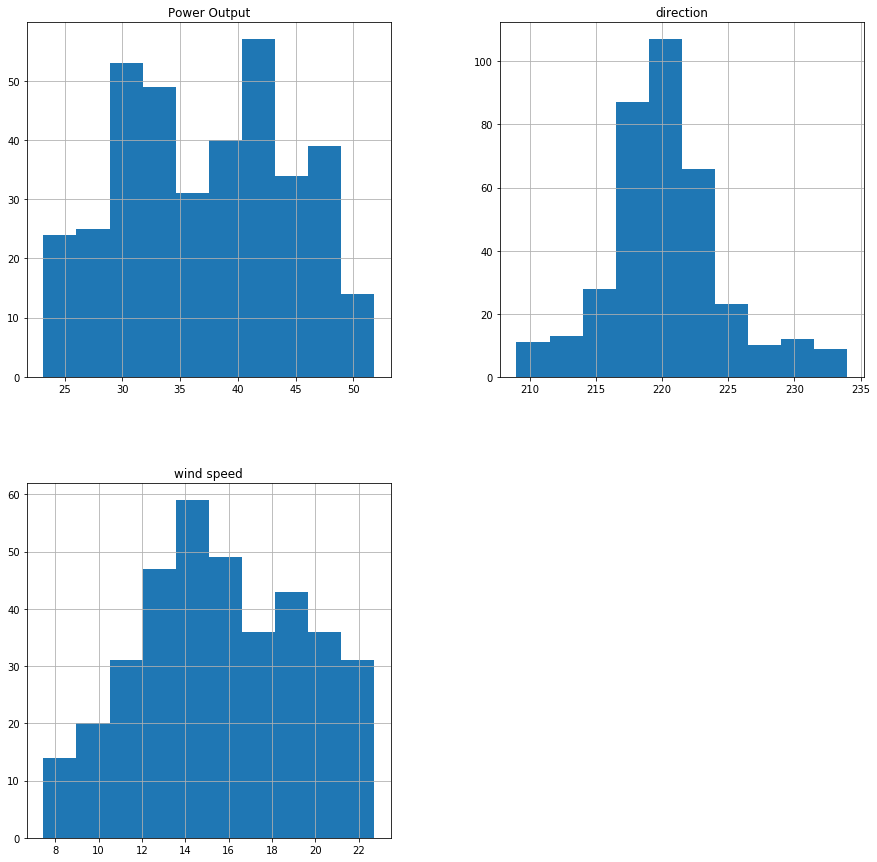

In [11]:
#Visualizing the dataframes
pd.DataFrame.hist(wind_df, figsize = [15,15]); 

Observation: Datapoints for all attributes fall into the same range

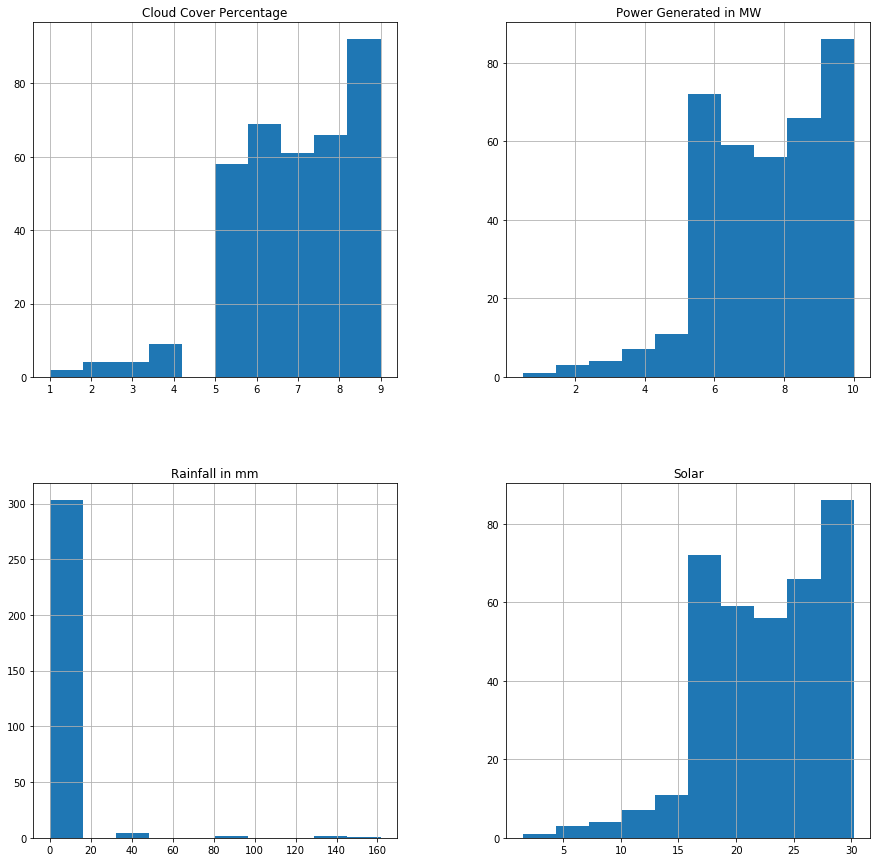

In [12]:
pd.DataFrame.hist(solar_df, figsize = [15,15]);

Observation: Datapoints for all attributes fall into the same range except Rainfall in mm

In [13]:
#checking datatypes
wind_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   wind speed    366 non-null    float64
 1   direction     366 non-null    int64  
 2   Power Output  366 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 8.7 KB


In [14]:
solar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temp Hi                 365 non-null    object 
 1   Temp Low                365 non-null    object 
 2   Solar                   365 non-null    float64
 3   Cloud Cover Percentage  365 non-null    int64  
 4   Rainfall in mm          312 non-null    float64
 5   Power Generated in MW   365 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 17.2+ KB


Observation: We convert Temp Hi and Temp Low datatype to float

In [15]:
solar_df

,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,109°,85°,30.0,9,0.0,9.93
1,106°,71°,30.1,9,0.0,9.97
2,106°,81°,29.5,9,0.0,9.77
3,102°,83°,13.0,4,0.0,4.30
4,105°,80°,30.1,9,0.0,9.97
...,...,...,...,...,...,...
360,101°,83°,26.4,8,NaN,8.74
361,102°,84°,25.8,8,NaN,8.54
362,104°,83°,26.9,8,NaN,8.91
363,105°,80°,25.1,8,NaN,8.31


In [16]:
solar_df['Temp Hi'] = solar_df['Temp Hi'].str.rstrip('°')
solar_df['Temp Low'] = solar_df['Temp Low'].str.rstrip('°')

In [17]:
solar_df['Temp Hi']=pd.to_numeric(solar_df['Temp Hi'], errors='coerce')
solar_df['Temp Low']=pd.to_numeric(solar_df['Temp Low'], errors='coerce')

In [18]:
solar_df

,Temp Hi,Temp Low,Solar,Cloud Cover Percentage,Rainfall in mm,Power Generated in MW
0,109,85,30.0,9,0.0,9.93
1,106,71,30.1,9,0.0,9.97
2,106,81,29.5,9,0.0,9.77
3,102,83,13.0,4,0.0,4.30
4,105,80,30.1,9,0.0,9.97
...,...,...,...,...,...,...
360,101,83,26.4,8,NaN,8.74
361,102,84,25.8,8,NaN,8.54
362,104,83,26.9,8,NaN,8.91
363,105,80,25.1,8,NaN,8.31


In [19]:
def missing_values_table(df):   #source : https://www.analyticsvidhya.com/blog/2020/06/feature-engineering-guide-data-science-hackathons/
       mis_val = df.isnull().sum()
       mis_val_percent = 100 * df.isnull().sum() / len(df)
       mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
       mis_val_table_ren_columns = mis_val_table.rename(
       columns = {0 : 'Missing Values', 1 : '% of Total Values'})
       mis_val_table_ren_columns = mis_val_table_ren_columns[
           mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
       '% of Total Values', ascending=False).round(1)
       print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"     
           "There are " + str(mis_val_table_ren_columns.shape[0]) +
             " columns that have missing values.")
       return mis_val_table_ren_columns
    
missing_values_table(solar_df) #calling the function

Your selected dataframe has 6 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
Rainfall in mm,53,14.5


Replace the missing value in Rainfall column with zero

In [20]:
solar_df=solar_df.fillna(0)

In [21]:
missing_values_table(wind_df)

Your selected dataframe has 3 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


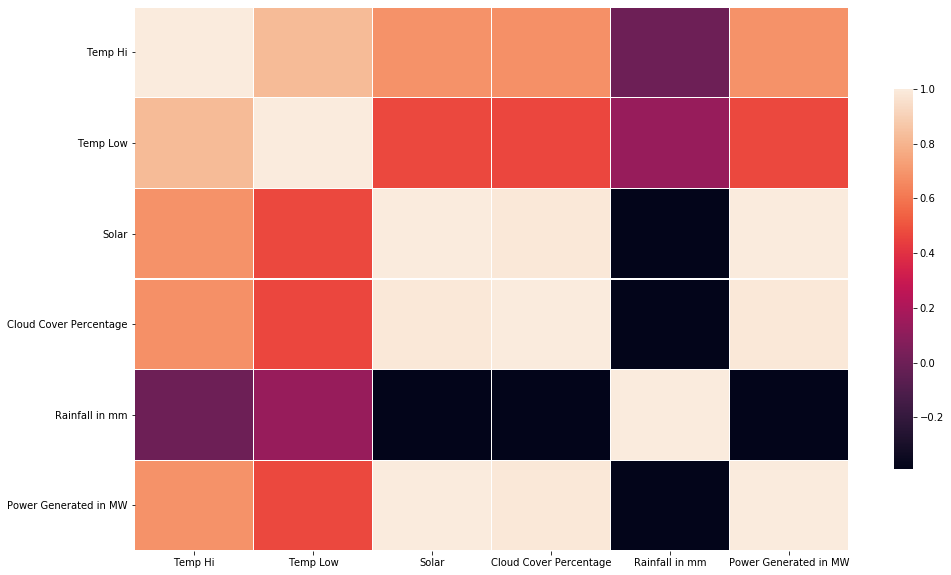

In [22]:
corr = solar_df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(corr, xticklabels=corr.columns.values, 
            yticklabels=corr.columns.values,  
            linewidths=.08,                   # set linewidth between entries in matrix
           cbar_kws={"shrink": .7})           # set length of legend on right


Looking at the weather forecast from the api. there is no values for the 'solar colmn' but we can see from the heatmap that it is highly correlated with CloudCover Percentage. 
Hence we can drop the column

In [23]:
solar_df=solar_df.drop('Solar', axis=1)

Creating prediction model for solar generation plant



Splitting solar generation data into training and test sets

In [24]:
X = solar_df.drop(['Power Generated in MW'], axis = 1).values # X are the input (or independent) variables
y = solar_df['Power Generated in MW'].values # y is output (or dependent) variable

In [25]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [26]:
# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(292, 4) (292,)
(73, 4) (73,)


In [28]:
#Fitting the model
lm = linear_model.LinearRegression()
solar_model = lm.fit(X_train,y_train)

In [29]:
#score the model
solar_model.score(X_test, y_test)

0.9482209604082114

In [30]:
##########################
# SAVE-LOAD using pickle #
##########################
import pickle

# save
with open('solar_model.pkl','wb') as f:
    pickle.dump(solar_model,f)


In [31]:
wind_df

,wind speed,direction,Power Output
0,16.00,218,34.76
1,15.91,218,36.59
2,15.82,218,32.35
3,15.73,218,39.37
4,15.64,218,33.22
...,...,...,...
361,10.59,233,40.49
362,10.36,233,34.65
363,10.12,234,39.53
364,9.87,234,32.29


In [32]:
# prediction model for wind generation plant



#Splitting solar generation data into training and test sets

X = wind_df.drop(['Power Output'], axis = 1).values # X are the input (or independent) variables
y = wind_df['Power Output'].values # y is output (or dependent) variable

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



#Fitting the model
model = RandomForestRegressor(n_jobs=-1)
model.set_params(n_estimators=12)
wind_model = model.fit(X_train,y_train)


#score the model
wind_model.score(X_test, y_test)




0.7345354562761248

In [33]:
import wind_forecast_data

[48.14666667 48.14666667 48.14666667 48.14666667 48.14666667 48.14666667
 48.14666667 48.14666667]


C:\Users\He Is SEYI\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\He Is SEYI\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:334: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.22.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [38]:
T=  wind_forecast_data.wind_df
scaler = StandardScaler()
scaler.fit(T)
T = scaler.transform(T)


In [39]:
wind_model.predict(T)

array([44.99833333, 44.99833333, 42.46833333, 32.815     , 32.94333333,
       31.6875    , 35.02666667, 32.8675    ])

In [61]:
import pickle

# save
with open('wind_model.pkl','wb') as f:
    pickle.dump(wind_model,f)
